<a href="https://colab.research.google.com/github/satrioadzi/visi-komputer-TI-2A/blob/main/praktikum_klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


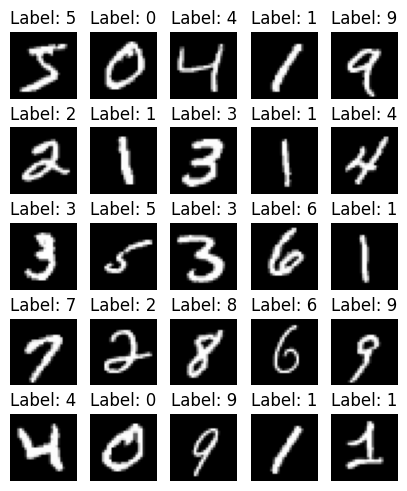

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,6))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

# Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

print("Melatih dengan kernel 'rbf'...")
clf_rbf = svm.SVC(kernel='rbf', gamma='scale') # gamma sangat penting untuk RBF
# Gunakan subset data yang sama untuk perbandingan yang adil
clf_rbf.fit(x_train_flat[:5000], y_train[:5000])
y_pred_rbf = clf_rbf.predict(x_test_flat)
print(f"Akurasi dengan kernel rbf: {accuracy_score(y_test, y_pred_rbf):.4f}")

Melatih dengan kernel 'rbf'...
Akurasi dengan kernel rbf: 0.9513


# Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.9182 - loss: 0.2660 - val_accuracy: 0.9833 - val_loss: 0.0584
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9882 - val_loss: 0.0415
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9890 - val_loss: 0.0364
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9898 - val_loss: 0.0467
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9890 - val_loss: 0.0389


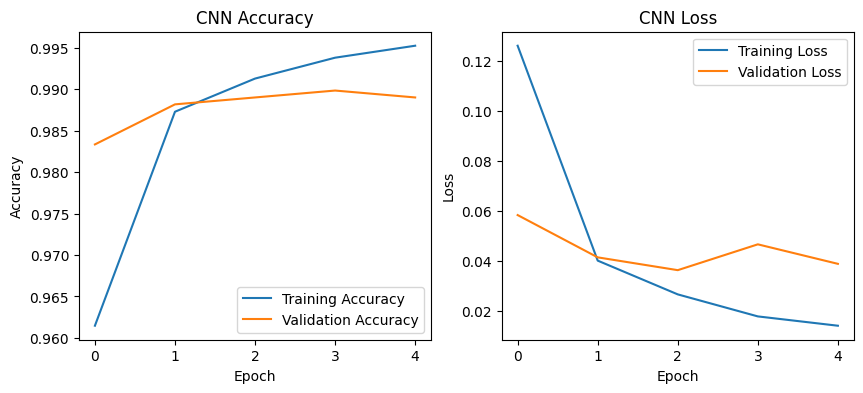

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'), # Tambahkan lapisan Conv2D kedua
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy'); plt.plot(history.history['val_accuracy'], label='Validation Accuracy'); plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss');
plt.plot(history.history['val_loss'], label='Validation Loss'); plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
704/704 - 56s - 79ms/step - accuracy: 0.3575 - loss: 1.7443 - val_accuracy: 0.5040 - val_loss: 1.4221
Epoch 2/10
704/704 - 50s - 72ms/step - accuracy: 0.4753 - loss: 1.4555 - val_accuracy: 0.5630 - val_loss: 1.2388
Epoch 3/10
704/704 - 80s - 114ms/step - accuracy: 0.5198 - loss: 1.3417 - val_accuracy: 0.6078 - val_loss: 1.1307
Epoch 4/10
704/704 - 82s - 117ms/step - accuracy: 0.5463 - loss: 1.2661 - val_accuracy: 0.6228 - val_loss: 1.0832
Epoch 5/10
704/704 - 81s - 115ms/step - accuracy: 0.5689 - loss: 1.2076 - val_accuracy: 0.6474 - val_loss: 1.0335
Epoch 6/10
704/704 - 82s - 117ms/step - accuracy: 0.5870 - loss: 1.1543 - val_accuracy: 0.6606 - val_loss: 0.9986
Epoch 7/10
704/704 - 49s - 70ms/step - accuracy: 0.6033 - loss: 1.1173 - val_accuracy: 0.6844 - val_loss: 0.9341
Epoch 8/10
704/704 - 49s - 69ms/step - accuracy: 0.6174 - loss: 1.0779 - val_accuracy: 0.6806 - val_loss: 0.9275
Epoch 9/10
704/704 - 82s - 116ms/step -

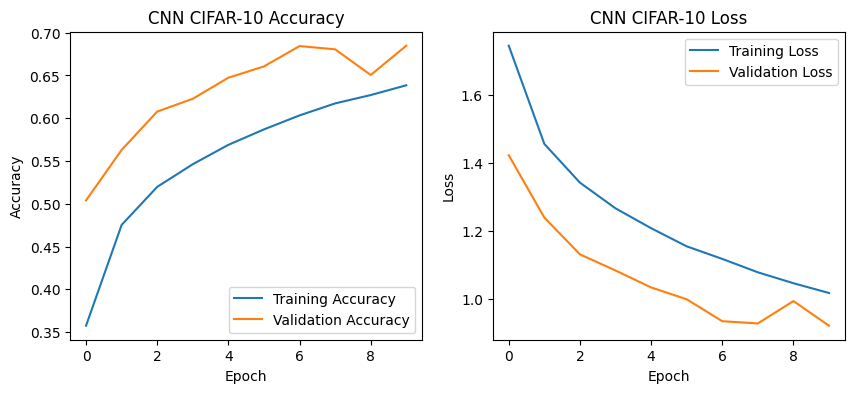

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# === Load & Normalisasi Data ===
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# === Definisi Model CNN dengan Dropout ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Tambahan dropout untuk mengurangi overfitting
    layers.Dense(10, activation='softmax')
])

# === Kompilasi Model ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Training Model ===
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=64,
    verbose=2
)

# === Evaluasi Model ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# === Plot Training vs Validation History ===
plt.figure(figsize=(10,4))

# Plot Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Praktikum D5 – Transfer Learning dengan Model Pra-Latih

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

# Load base model tanpa top classifier
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Awalnya freeze semua
base_model.trainable = False

# Aktifkan hanya 2 lapisan terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 364ms/step
              precision    recall  f1-score   support

           0       0.05      0.01      0.02      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.06      0.04      0.05      1000
           5       0.11      0.59      0.19      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.05      0.04      0.05      1000
           9       0.11      0.34      0.17      1000

    accuracy                           0.10     10000
   macro avg       0.04      0.10      0.05     10000
weighted avg       0.04      0.10      0.05     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


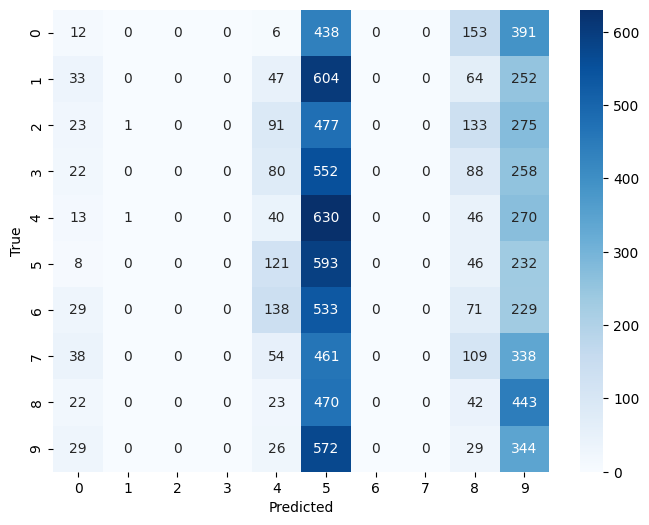

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# tugas klasifikasi tulisan angka

Jumlah data: 10
Shape data gambar: (10, 28, 28)
Shape label: (10,)


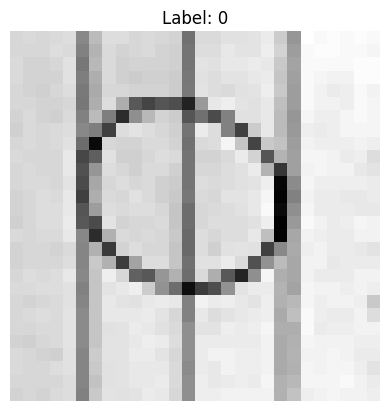

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image # Import Pillow for image manipulation

dataset_path = "/content/drive/MyDrive/TugasKuliah/test_digits"

X = []  # gambar
y = []  # label

for fname in os.listdir(dataset_path):
    if fname.endswith(".jpg") or fname.endswith(".png"):  # filter file gambar
        # baca gambar
        img_path = os.path.join(dataset_path, fname)
        img = Image.open(img_path).convert('L') # Buka gambar dan ubah ke grayscale
        img = img.resize((28, 28)) # Ubah ukuran gambar menjadi 28x28
        img_array = np.array(img) # Ubah gambar PIL menjadi array NumPy

        # ambil label dari nama file, misal: 'angka 0.jpg' -> 0
        try:
            label = int(fname.split(" ")[1].split(".")[0])
        except IndexError:
            # Handle cases where filename format might not match 'angka X.jpg'
            print(f"Warning: Could not extract label from filename {fname}. Skipping.")
            continue # Skip this file if label extraction fails

        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Jumlah data:", len(X))
print("Shape data gambar:", X.shape)
print("Shape label:", y.shape)

# tampilkan contoh
if len(X) > 0:
    plt.imshow(X[0], cmap="gray")
    plt.title(f"Label: {y[0]}")
    plt.axis("off")
    plt.show()
else:
    print("No images loaded to display.")

klasifikasi dengan model SVM

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# === Fungsi preprocessing agar mirip MNIST ===
def preprocess_to_mnist_28x28(img_pil):
    # Grayscale
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Invert bila latar terang (kertas putih)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Resize ke 20x20 sambil jaga rasio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    return canvas, arr

# === Load dataset custom (pakai nama file sebagai label) ===
dataset_path = "/content/drive/MyDrive/TugasKuliah/test_digits"

X_custom = []
y_custom = []

for fname in os.listdir(dataset_path):
    if fname.endswith(".jpg") or fname.endswith(".png"):
        img_pil = Image.open(os.path.join(dataset_path, fname))

        # Preprocess ke format MNIST
        _, arr = preprocess_to_mnist_28x28(img_pil)

        # Flatten (28*28 = 784)
        X_custom.append(arr.flatten())

        # Ambil label dari nama file: "angka 0.jpg" -> 0
        label = int(fname.split(" ")[1].split(".")[0])
        y_custom.append(label)

X_custom = np.array(X_custom)
y_custom = np.array(y_custom)

print("Shape X_custom:", X_custom.shape)  # (jumlah gambar, 784)
print("Shape y_custom:", y_custom.shape)

# === Prediksi dengan SVM yang sudah dilatih di MNIST ===
y_pred_custom = clf_rbf.predict(X_custom)

# Tampilkan hasil
for fname, pred, true in zip(os.listdir(dataset_path), y_pred_custom, y_custom):
    print(f"{fname} -> Prediksi: {pred}, Label asli: {true}")


Shape X_custom: (10, 784)
Shape y_custom: (10,)
angka 0.jpg -> Prediksi: 2, Label asli: 0
angka 1.jpg -> Prediksi: 4, Label asli: 1
angka 2.jpg -> Prediksi: 4, Label asli: 2
angka 3.jpg -> Prediksi: 4, Label asli: 3
angka 4.jpg -> Prediksi: 4, Label asli: 4
angka 5.jpg -> Prediksi: 4, Label asli: 5
angka 6.jpg -> Prediksi: 4, Label asli: 6
angka 7.jpg -> Prediksi: 4, Label asli: 7
angka 8.jpg -> Prediksi: 4, Label asli: 8
angka 9.jpg -> Prediksi: 4, Label asli: 9


upload and pre-process

In [25]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar (jpg/png)
# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas hitam) =====
import numpy as np
from PIL import Image, ImageOps
def preprocess_to_mnist_28x28(img_pil):
 """
 Langkah:
 - Konversi ke grayscale
 - Auto-contrast
 - (Opsional) invert bila latar terang (agar digit jadi putih, latar  jadi gelap seperti MNIST)
 - Crop ke bounding box digit
 - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)  - Normalisasi ke [0,1] dan tambah axis channel
 """
 # Grayscale + autocontrast
 img = img_pil.convert('L')
 img = ImageOps.autocontrast(img)
 arr = np.array(img).astype(np.uint8)
 # Jika rata-rata terang (kertas putih), invert supaya digit menjadi  putih di atas latar gelap (gaya MNIST)
 if arr.mean() > 127:
  img = ImageOps.invert(img)
  arr = np.array(img)
 # Binarisasi ringan untuk cari bbox digit
 thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
 mask = arr > thr
 if mask.any():
  ys, xs = np.where(mask)
  y0, y1 = ys.min(), ys.max()
  x0, x1 = xs.min(), xs.max()
  img = img.crop((x0, y0, x1+1, y1+1))
 # Resize ke 20x20 dengan aspect ratio
 img.thumbnail((20, 20), Image.Resampling.LANCZOS)
 w, h = img.size
 # Pad ke 28x28 dan center
 canvas = Image.new('L', (28, 28), color=0)
 canvas.paste(img, ((28 - w)//2, (28 - h)//2))
 # Normalisasi ke [0,1]
 arr = np.array(canvas).astype('float32') / 255.0
 # Tambah channel dim (28,28,1)
 arr = arr[..., None]
 return canvas, arr

Saving angka 1.jpg to angka 1.jpg


prediksi dengan SVM

In [26]:
from sklearn.metrics import accuracy_score
results = []
for fname in uploaded.keys():
 img_pil = Image.open(fname)
 _, x = preprocess_to_mnist_28x28(img_pil) # x: (28,28,1) float [0,1]
 x_flat = x.reshape(1, -1) # (1,784)
 pred = int(clf_rbf.predict(x_flat)[0]) # Menggunakan clf_rbf sesuai dengan pelatihan SVM
 # SVM default tidak punya proba kecuali SVC(probability=True). Jika Anda ingin probabilitas:
 # clf = svm.SVC(kernel='rbf', gamma='scale', probability=True) saat pelatihan.
 conf = None
 try:
  if hasattr(clf_rbf, "predict_proba"): # Menggunakan clf_rbf
   conf = float(np.max(clf_rbf.predict_proba(x_flat))) # Menggunakan clf_rbf
 except Exception:
  pass
 results.append((fname, pred, conf))
 # Tampilkan hasil (gunakan gambar 28x28 yang sudah diproses di tahap CNN juga boleh)
 print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))

angka 1.jpg -> Prediksi SVM: 4
